## Direct-Mail Fundraising Project - Predictive Modeling

### Read Note Attached

Before commencing the task of importing the dataset, let's first delve into some data for our reference.

#### Data

The file Fundraising.csv contains 3120 records with 50% donors (TARGET_B = 1) and 50% non-donors (TARGET_B = 0). The amount of donation (TARGET_D) is also included but is not used in this case. The descriptions for the 22 variables (including two target variables) are listed in Notes.

Step 1: Partitioning: Partition the dataset into 60% training and 40% validation (set the seed to 12345).

Step 2: Model Building

##### We will Download, Install and Import all the libraries and packages

In [1]:
%matplotlib inline
# !pip install mord
# !pip install statsmodels
# !pip install scikit-plot
# !pip install pydotplus
# !pip install graphviz
# !pip install dmba

# /*Commenting These files since they are to be downloaded just once */

#### Importing necessary libraries 

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

import scikitplot as skplt
import sklearn.linear_model as sk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score

from dmba import classificationSummary, gainsChart, liftChart

import statsmodels.api as sm

#### Importing the data set 

In [3]:
df1 = pd.read_csv (r'C:/Users/nisar/Downloads/Final Project/Fundraising.csv')
df1.head()

Row Id  Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0       1       17             0             1             0             0   
1       2       25             1             0             0             0   
2       3       29             0             0             0             1   
3       4       38             0             0             0             1   
4       5       40             0             1             0             0   

   homeowner dummy  NUMCHLD  INCOME  gender dummy  ...  IC15  NUMPROM  \
0                1        1       5             1  ...     1       74   
1                1        1       1             0  ...     4       46   
2                0        2       5             1  ...    13       32   
3                1        1       3             0  ...     4       94   
4                1        1       4             0  ...     7       20   

   RAMNTALL  MAXRAMNT  LASTGIFT  totalmonths  TIMELAG   AVGGIFT  TARGET_B  \
0     102.0       6.0       5.0           29        3  4.857143         1   
1      94.0      12.0      12.0           34        6  9.400000         1   
2      30.0      10.0       5.0           29        7  4.285714         1   
3     177.0      10.0       8.0           30        3  7.080000         0   
4      23.0      11.0      11.0           30        6  7.666667         0   

   TARGET_D  
0       5.0  
1      10.0  
2       5.0  
3       0.0  
4       0.0  

[5 rows x 24 columns]

#### Checking number of rows x columns

In [4]:
df1.shape

(3120, 24)

#### Checking number of columns

In [5]:
df1.columns

Index(['Row Id', 'Row Id.', 'zipconvert_2', 'zipconvert_3', 'zipconvert_4',
       'zipconvert_5', 'homeowner dummy', 'NUMCHLD', 'INCOME', 'gender dummy',
       'WEALTH', 'HV', 'Icmed', 'Icavg', 'IC15', 'NUMPROM', 'RAMNTALL',
       'MAXRAMNT', 'LASTGIFT', 'totalmonths', 'TIMELAG', 'AVGGIFT', 'TARGET_B',
       'TARGET_D'],
      dtype='object')

Typically, we would proceed with renaming the columns at this stage, but in this instance, there's no need for us to do so.

#### Checking information concerning the Dataset

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row Id           3120 non-null   int64  
 1   Row Id.          3120 non-null   int64  
 2   zipconvert_2     3120 non-null   int64  
 3   zipconvert_3     3120 non-null   int64  
 4   zipconvert_4     3120 non-null   int64  
 5   zipconvert_5     3120 non-null   int64  
 6   homeowner dummy  3120 non-null   int64  
 7   NUMCHLD          3120 non-null   int64  
 8   INCOME           3120 non-null   int64  
 9   gender dummy     3120 non-null   int64  
 10  WEALTH           3120 non-null   int64  
 11  HV               3120 non-null   int64  
 12  Icmed            3120 non-null   int64  
 13  Icavg            3120 non-null   int64  
 14  IC15             3120 non-null   int64  
 15  NUMPROM          3120 non-null   int64  
 16  RAMNTALL         3120 non-null   float64
 17  MAXRAMNT      

#### Checking for Null and Missing Values in the Dataset

In [7]:
df1.isnull().sum()

Row Id             0
Row Id.            0
zipconvert_2       0
zipconvert_3       0
zipconvert_4       0
zipconvert_5       0
homeowner dummy    0
NUMCHLD            0
INCOME             0
gender dummy       0
WEALTH             0
HV                 0
Icmed              0
Icavg              0
IC15               0
NUMPROM            0
RAMNTALL           0
MAXRAMNT           0
LASTGIFT           0
totalmonths        0
TIMELAG            0
AVGGIFT            0
TARGET_B           0
TARGET_D           0
dtype: int64

After completing this step, we typically address any missing or null values based on their size and characteristics. However, since we don't have any null values or missing data in this case, we do nothing.

Learning Curve: There are two types of imputation–single or multiple. Usually when people talk about imputation, they mean single.

Single refers to the fact that you come up with a single estimate of the missing value, using one of the seven methods listed below.

1. Mean imputation, 2. Substitution, 3. Hot deck imputation, 4. Cold deck imputation, 5. Regression imputation, 6. Stochastic regression imputation, 7. Interpolation and Extrapolation.

#### Checking data type of each column 

In [8]:
df1.dtypes

Row Id               int64
Row Id.              int64
zipconvert_2         int64
zipconvert_3         int64
zipconvert_4         int64
zipconvert_5         int64
homeowner dummy      int64
NUMCHLD              int64
INCOME               int64
gender dummy         int64
WEALTH               int64
HV                   int64
Icmed                int64
Icavg                int64
IC15                 int64
NUMPROM              int64
RAMNTALL           float64
MAXRAMNT           float64
LASTGIFT           float64
totalmonths          int64
TIMELAG              int64
AVGGIFT            float64
TARGET_B             int64
TARGET_D           float64
dtype: object

#### Let's look at the unique values in each column

In [9]:
print(df1.nunique())

Row Id             3120
Row Id.            3120
zipconvert_2          2
zipconvert_3          2
zipconvert_4          2
zipconvert_5          2
homeowner dummy       2
NUMCHLD               5
INCOME                7
gender dummy          2
WEALTH               10
HV                 1552
Icmed               654
Icavg               674
IC15                 69
NUMPROM             125
RAMNTALL            423
MAXRAMNT             57
LASTGIFT             53
totalmonths          21
TIMELAG              43
AVGGIFT            1298
TARGET_B              2
TARGET_D             56
dtype: int64


#### Exploring Relationship between variables in a dataset for Identifying Patterns, Understanding relationships, Feature Selection, Diagnostic tool (for data preprocessing)

<AxesSubplot:>

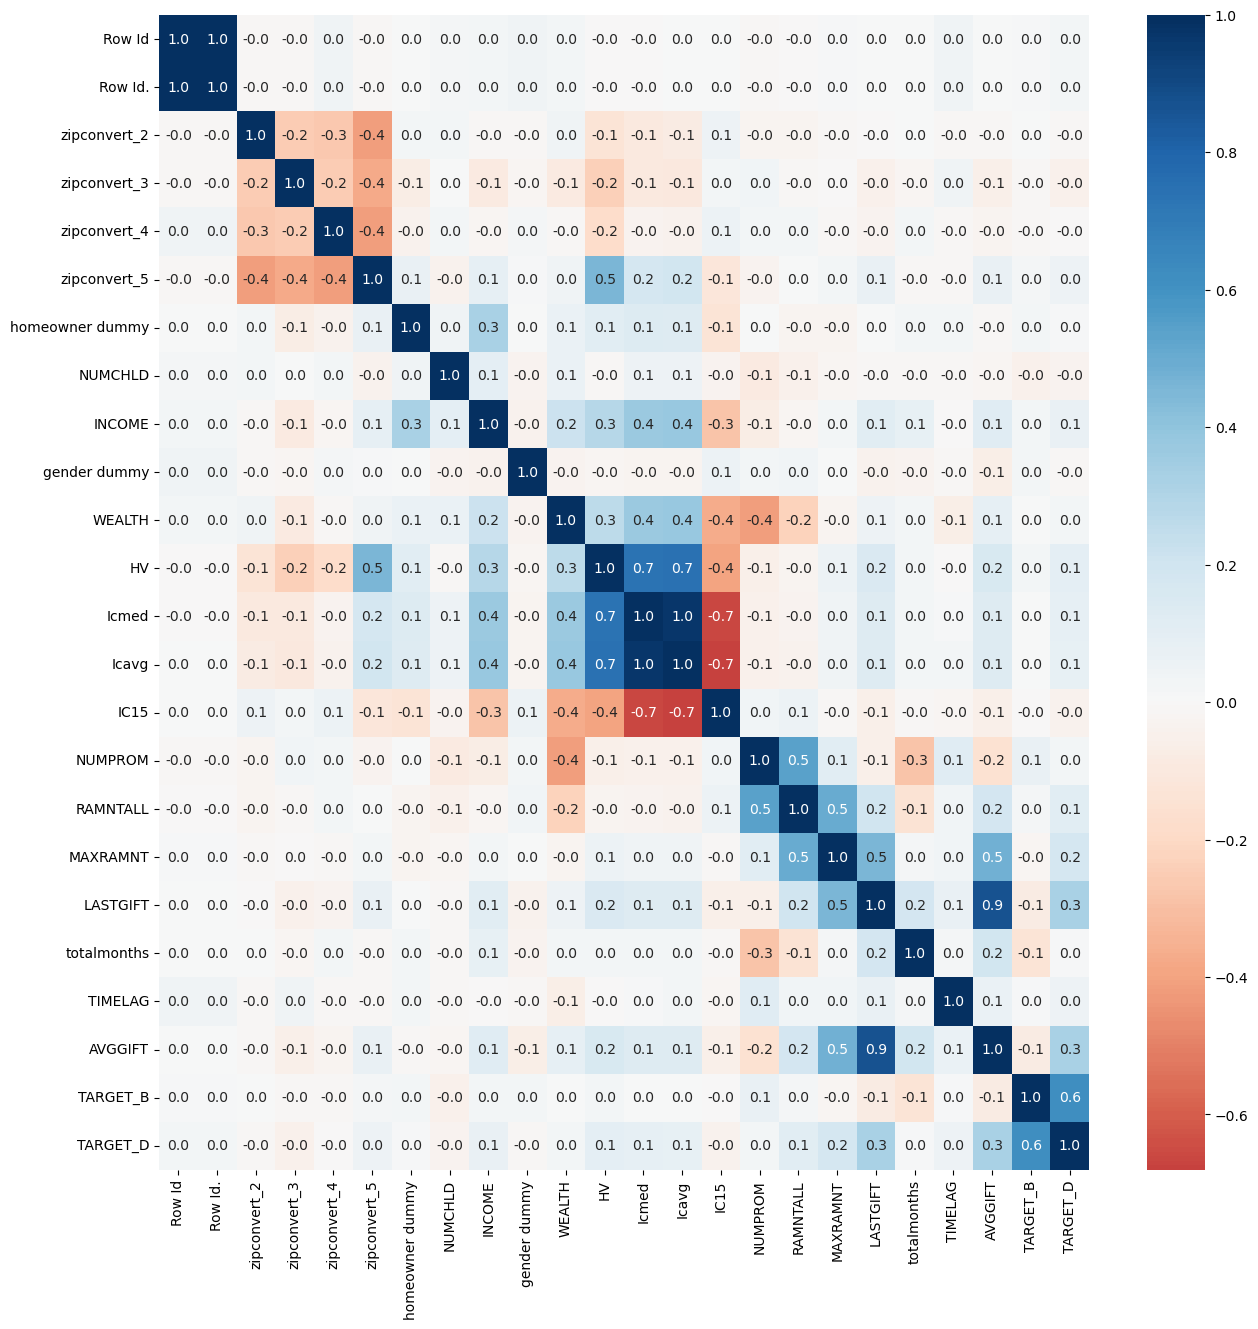

In [10]:
corr = df1.corr()
corr
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [11]:
#df1 = df1.drop(columns=['Row Id', 'Icavg', 'TARGET_D'], axis=1)
df1 = df1.drop(columns=['Row Id.', 'TARGET_D'], axis=1)

df1.head()

Row Id  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0       1             0             1             0             0   
1       2             1             0             0             0   
2       3             0             0             0             1   
3       4             0             0             0             1   
4       5             0             1             0             0   

   homeowner dummy  NUMCHLD  INCOME  gender dummy  WEALTH  ...  Icavg  IC15  \
0                1        1       5             1       9  ...    703     1   
1                1        1       1             0       7  ...    463     4   
2                0        2       5             1       8  ...    376    13   
3                1        1       3             0       4  ...    546     4   
4                1        1       4             0       8  ...    432     7   

   NUMPROM  RAMNTALL  MAXRAMNT  LASTGIFT  totalmonths  TIMELAG   AVGGIFT  \
0       74     102.0       6.0       5.0           29        3  4.857143   
1       46      94.0      12.0      12.0           34        6  9.400000   
2       32      30.0      10.0       5.0           29        7  4.285714   
3       94     177.0      10.0       8.0           30        3  7.080000   
4       20      23.0      11.0      11.0           30        6  7.666667   

   TARGET_B  
0         1  
1         1  
2         1  
3         0  
4         0  

[5 rows x 22 columns]

#### Let us check the descriptive statistics on rest of the columns

In [12]:
df1.describe()

Row Id  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
count  3120.000000   3120.000000   3120.000000   3120.000000   3120.000000   
mean   1560.500000      0.214423      0.185256      0.214423      0.384615   
std     900.810746      0.410487      0.388568      0.410487      0.486582   
min       1.000000      0.000000      0.000000      0.000000      0.000000   
25%     780.750000      0.000000      0.000000      0.000000      0.000000   
50%    1560.500000      0.000000      0.000000      0.000000      0.000000   
75%    2340.250000      0.000000      0.000000      0.000000      1.000000   
max    3120.000000      1.000000      1.000000      1.000000      1.000000   

       homeowner dummy      NUMCHLD       INCOME  gender dummy       WEALTH  \
count      3120.000000  3120.000000  3120.000000   3120.000000  3120.000000   
mean          0.770192     1.069231     3.893910      0.609295     6.402244   
std           0.420777     0.347688     1.636186      0.487987     2.539978   
min           0.000000     1.000000     1.000000      0.000000     0.000000   
25%           1.000000     1.000000     3.000000      0.000000     5.000000   
50%           1.000000     1.000000     4.000000      1.000000     8.000000   
75%           1.000000     1.000000     5.000000      1.000000     8.000000   
max           1.000000     5.000000     7.000000      1.000000     9.000000   

       ...        Icavg         IC15      NUMPROM     RAMNTALL     MAXRAMNT  \
count  ...  3120.000000  3120.000000  3120.000000  3120.000000  3120.000000   
mean   ...   432.088141    14.702885    49.089423   110.399875    16.651397   
std    ...   168.195104    12.079882    22.717130   147.299933    22.223521   
min    ...     0.000000     0.000000    11.000000    15.000000     5.000000   
25%    ...   318.000000     5.000000    29.000000    45.000000    10.000000   
50%    ...   396.000000    12.000000    48.000000    81.000000    15.000000   
75%    ...   516.000000    21.000000    65.000000   134.625000    20.000000   
max    ...  1331.000000    90.000000   157.000000  5674.900000  1000.000000   

          LASTGIFT  totalmonths      TIMELAG      AVGGIFT    TARGET_B  
count  3120.000000  3120.000000  3120.000000  3120.000000  3120.00000  
mean     13.522917    31.136859     6.861859    10.690713     0.50000  
std      10.581439     4.132952     5.561209     7.443980     0.50008  
min       0.000000    17.000000     0.000000     2.138889     0.00000  
25%       7.000000    29.000000     3.000000     6.356092     0.00000  
50%      10.000000    31.000000     5.000000     9.000000     0.50000  
75%      16.000000    34.000000     9.000000    12.811652     1.00000  
max     219.000000    37.000000    77.000000   122.166667     1.00000  

[8 rows x 22 columns]

Histogram and Box Plot are good visual representation. Both allow us to see the representation of a dataset, allowing quick identification of patterns, central tendencies, variablilty, and potential outliers in the data.

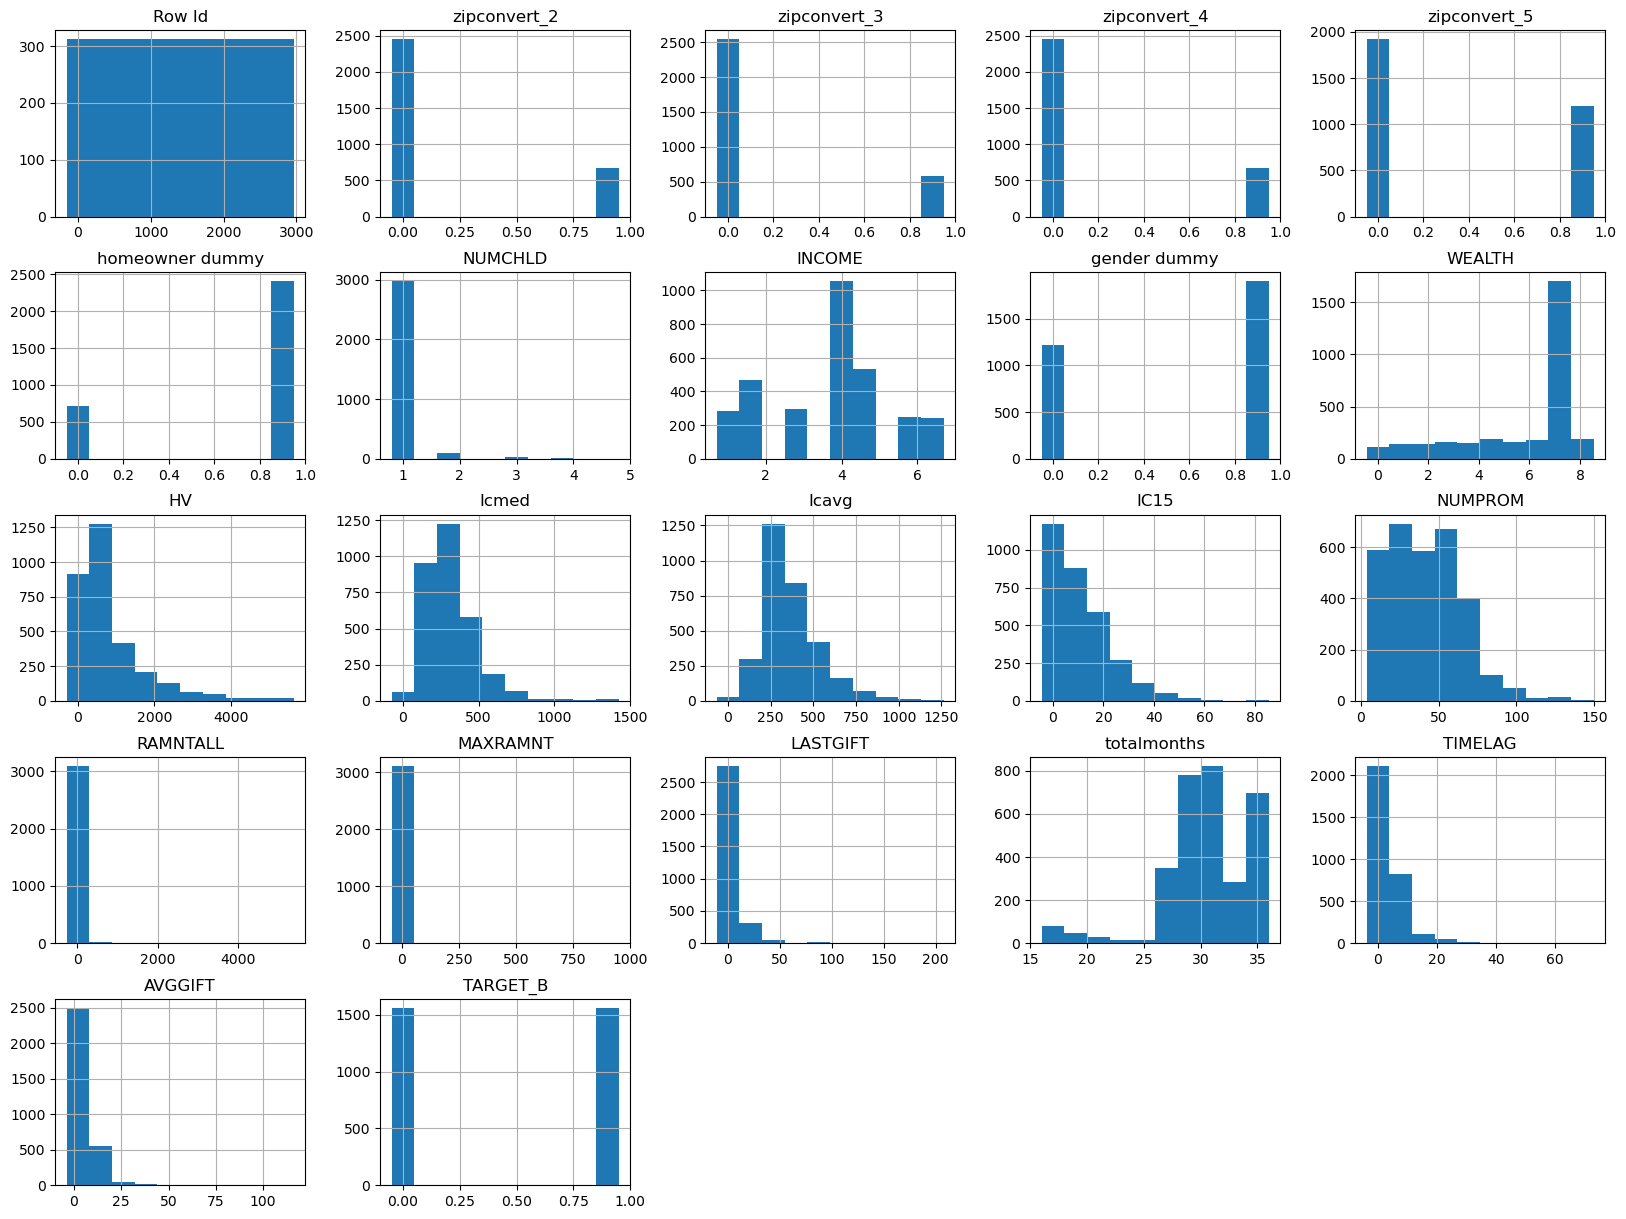

In [13]:
histograms = df1.hist(figsize=(20, 15), align='left')
plt.show()

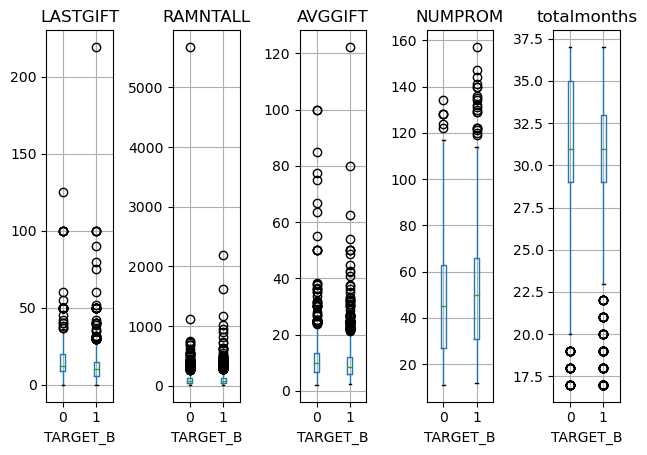

In [14]:
# Box-plot for Donor's and Non-Donor's to identify Outliers with other columns LASTGIFT, RAMNTALL, AVGGIFT, NUMPROM

fig, axes = plt.subplots(nrows = 1, ncols = 5)
df1.boxplot(column = 'LASTGIFT', by = 'TARGET_B', ax = axes[0])
df1.boxplot(column = 'RAMNTALL', by = 'TARGET_B', ax = axes[1])
df1.boxplot(column = 'AVGGIFT', by = 'TARGET_B', ax = axes[2])
df1.boxplot(column = 'NUMPROM', by = 'TARGET_B', ax = axes[3])
df1.boxplot(column = 'totalmonths', by = 'TARGET_B', ax = axes[4])


for ax in axes:
    ax.set_xlabel('TARGET_B')
    
plt.suptitle('')
plt.tight_layout()

<Figure size 1100x700 with 0 Axes>

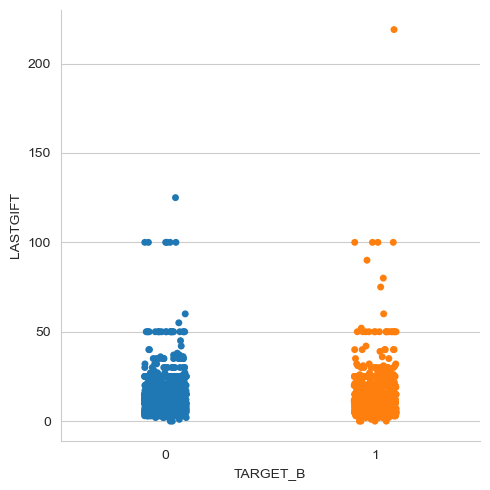

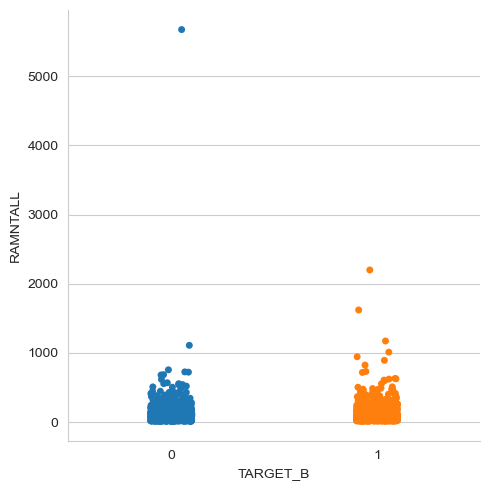

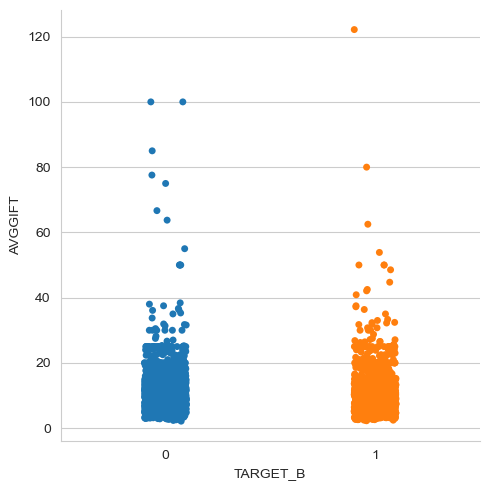

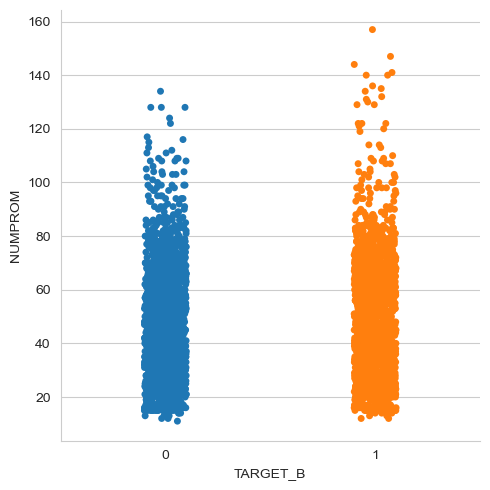

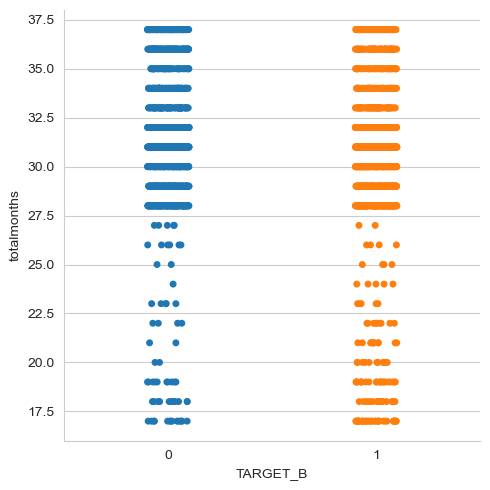

In [15]:
# Scatter-plot for Donor's and Non-Donor's to identify spread with other columns LASTGIFT, RAMNTALL, AVGGIFT, NUMPROM

sns.set_style("whitegrid")
plt.figure(figsize=(11,7))
sns.catplot(x = 'TARGET_B', y = 'LASTGIFT', order = [0, 1], data = df1)
sns.catplot(x = 'TARGET_B', y = 'RAMNTALL', order = [0, 1], data = df1)
sns.catplot(x = 'TARGET_B', y = 'AVGGIFT', order = [0, 1], data = df1)
sns.catplot(x = 'TARGET_B', y = 'NUMPROM', order = [0, 1], data = df1)
sns.catplot(x = 'TARGET_B', y = 'totalmonths', order = [0, 1], data = df1)

<Figure size 1100x700 with 0 Axes>

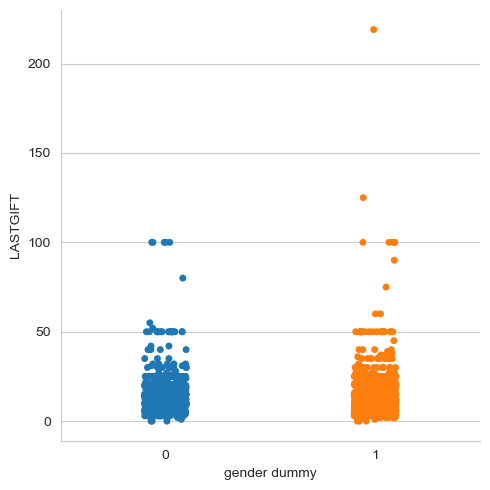

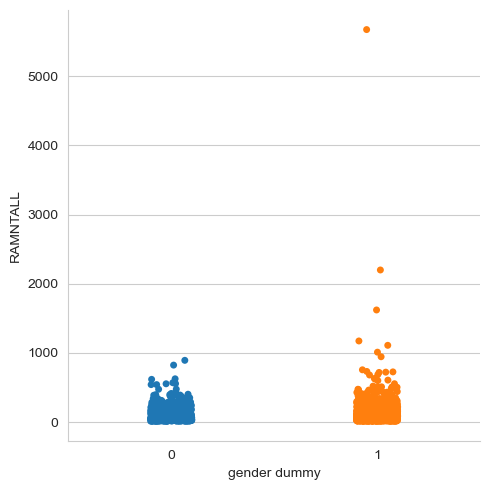

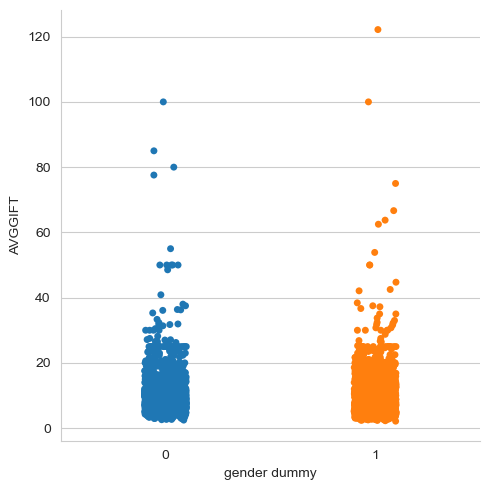

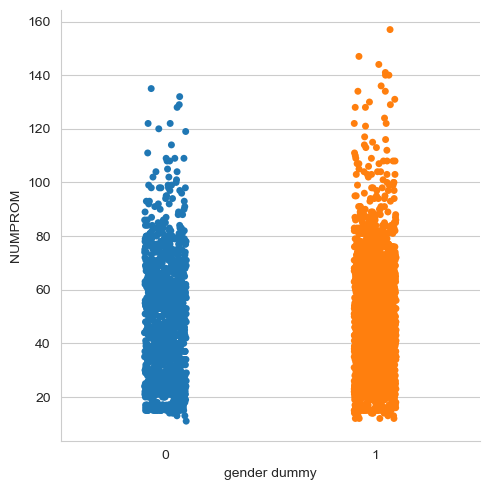

In [16]:
# Scatter-plot for 0 (Male) and 1 (Female) to identify spread with other columns LASTGIFT, RAMNTALL, AVGGIFT, NUMPROM

sns.set_style("whitegrid")
plt.figure(figsize=(11,7))
sns.catplot(x = 'gender dummy', y = 'LASTGIFT', order = [0, 1], data = df1)
sns.catplot(x = 'gender dummy', y = 'RAMNTALL', order = [0, 1], data = df1)
sns.catplot(x = 'gender dummy', y = 'AVGGIFT', order = [0, 1], data = df1)
sns.catplot(x = 'gender dummy', y = 'NUMPROM', order = [0, 1], data = df1)


# Logistic Regression Model

#### Selecting columns for Regression Analysis 

In [17]:
y = df1['TARGET_B']
X = df1.drop(columns=['TARGET_B'])

In [18]:
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.6,
random_state=12345)

train_X represents the features used for training the regression model.

valid_X represents the features used for validating or evaluating the performance of the trained model.

In [19]:
train_X.describe()

Row Id  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
count  1248.000000   1248.000000   1248.000000   1248.000000   1248.000000   
mean   1597.383013      0.225160      0.185096      0.220353      0.368590   
std     904.287563      0.417855      0.388531      0.414651      0.482616   
min       5.000000      0.000000      0.000000      0.000000      0.000000   
25%     802.500000      0.000000      0.000000      0.000000      0.000000   
50%    1630.500000      0.000000      0.000000      0.000000      0.000000   
75%    2377.250000      0.000000      0.000000      0.000000      1.000000   
max    3120.000000      1.000000      1.000000      1.000000      1.000000   

       homeowner dummy      NUMCHLD       INCOME  gender dummy       WEALTH  \
count      1248.000000  1248.000000  1248.000000   1248.000000  1248.000000   
mean          0.782853     1.057692     3.911859      0.613782     6.344551   
std           0.412469     0.304795     1.606499      0.487077     2.579893   
min           0.000000     1.000000     1.000000      0.000000     0.000000   
25%           1.000000     1.000000     3.000000      0.000000     5.000000   
50%           1.000000     1.000000     4.000000      1.000000     8.000000   
75%           1.000000     1.000000     5.000000      1.000000     8.000000   
max           1.000000     4.000000     7.000000      1.000000     9.000000   

       ...        Icmed        Icavg         IC15      NUMPROM     RAMNTALL  \
count  ...  1248.000000  1248.000000  1248.000000  1248.000000  1248.000000   
mean   ...   385.978365   429.492788    14.939103    49.615385   113.127821   
std    ...   173.562245   168.912394    12.419020    22.530802   194.082122   
min    ...     0.000000     0.000000     0.000000    12.000000    15.000000   
25%    ...   276.000000   316.000000     5.000000    30.000000    46.000000   
50%    ...   354.000000   395.000000    12.000000    48.000000    83.000000   
75%    ...   463.250000   512.500000    22.000000    65.250000   134.625000   
max    ...  1500.000000  1228.000000    90.000000   147.000000  5674.900000   

          MAXRAMNT     LASTGIFT  totalmonths      TIMELAG      AVGGIFT  
count  1248.000000  1248.000000  1248.000000  1248.000000  1248.000000  
mean     16.510016    13.431490    31.145833     6.961538    10.635531  
std      16.954598    11.570446     4.052132     5.386442     7.869007  
min       5.000000     0.000000    17.000000     0.000000     2.138889  
25%      10.000000     7.000000    29.000000     4.000000     6.123162  
50%      15.000000    10.000000    31.000000     5.000000     9.000000  
75%      20.000000    15.250000    34.000000     9.000000    12.732955  
max     375.000000   219.000000    37.000000    62.000000   122.166667  

[8 rows x 21 columns]

In [20]:
valid_X.describe()

Row Id  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
count  1872.000000   1872.000000   1872.000000   1872.000000   1872.000000   
mean   1535.911325      0.207265      0.185363      0.210470      0.395299   
std     897.885577      0.405455      0.388696      0.407751      0.489045   
min       1.000000      0.000000      0.000000      0.000000      0.000000   
25%     770.500000      0.000000      0.000000      0.000000      0.000000   
50%    1513.500000      0.000000      0.000000      0.000000      0.000000   
75%    2316.250000      0.000000      0.000000      0.000000      1.000000   
max    3118.000000      1.000000      1.000000      1.000000      1.000000   

       homeowner dummy      NUMCHLD       INCOME  gender dummy       WEALTH  \
count      1872.000000  1872.000000  1872.000000   1872.000000  1872.000000   
mean          0.761752     1.076923     3.881944      0.606303     6.440705   
std           0.426125     0.373439     1.656000      0.488699     2.512972   
min           0.000000     1.000000     1.000000      0.000000     0.000000   
25%           1.000000     1.000000     3.000000      0.000000     5.000000   
50%           1.000000     1.000000     4.000000      1.000000     8.000000   
75%           1.000000     1.000000     5.000000      1.000000     8.000000   
max           1.000000     5.000000     7.000000      1.000000     9.000000   

       ...        Icmed        Icavg         IC15      NUMPROM     RAMNTALL  \
count  ...  1872.000000  1872.000000  1872.000000  1872.000000  1872.000000   
mean   ...   389.709936   433.818376    14.545406    48.738782   108.581245   
std    ...   172.346902   167.738086    11.849135    22.839777   105.149287   
min    ...     0.000000     0.000000     0.000000    11.000000    15.000000   
25%    ...   278.000000   319.000000     5.000000    28.000000    45.000000   
50%    ...   357.000000   398.000000    12.000000    47.000000    80.000000   
75%    ...   466.000000   517.000000    21.000000    64.000000   134.250000   
max    ...  1500.000000  1331.000000    90.000000   157.000000  1622.000000   

          MAXRAMNT     LASTGIFT  totalmonths      TIMELAG      AVGGIFT  
count  1872.000000  1872.000000  1872.000000  1872.000000  1872.000000  
mean     16.745652    13.583868    31.130876     6.795406    10.727501  
std      25.133793     9.869941     4.187031     5.675184     7.148515  
min       5.000000     0.000000    17.000000     0.000000     2.445946  
25%      10.000000     7.000000    29.000000     3.000000     6.537179  
50%      15.000000    11.000000    31.000000     5.000000     9.074176  
75%      20.000000    16.000000    34.000000     8.000000    12.845865  
max    1000.000000   125.000000    37.000000    77.000000   100.000000  

[8 rows x 21 columns]

train_y represents the target variable used for training the regression model.

valid_y represents the target variable used for validating or evaluating the performance of the trained model.

In [21]:
train_y.describe()

count    1248.000000
mean        0.497596
std         0.500195
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: TARGET_B, dtype: float64

In [22]:
valid_y.describe()

count    1872.000000
mean        0.501603
std         0.500131
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: TARGET_B, dtype: float64

#### Performing Logistic Regression

In [23]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

Mean Error is indicating that, on average, the model's prediction are 0.0216 units away from observed value. Which is to say that mean error close to zero suggests that the model is making relatively accurate predictions on average.

Root Mean Squared Error represents deviation of the model prediction from the actual values. A lower RMSE indicates better predictions.

Mean Absolute Error indicates that the model prediction are 0.4367 units away from the observed values. A lower MAE suggests better predictive performance, with values closer to zero indicating more accurate predictions.

In [24]:
regressionSummary(train_y, logit_reg.predict(train_X))


Regression statistics

               Mean Error (ME) : 0.0096
Root Mean Squared Error (RMSE) : 0.6626
     Mean Absolute Error (MAE) : 0.4391


In [25]:
regressionSummary(valid_y, logit_reg.predict(valid_X))


Regression statistics

               Mean Error (ME) : 0.0433
Root Mean Squared Error (RMSE) : 0.6622
     Mean Absolute Error (MAE) : 0.4386


Intercept value is important because it determines the baseline probability of the positive class in logistic regression model.

##### Errors based on training data set tells us about the model fit. Those on validation tells us about about the Model Ability to predict new data.

##### For this reason, we are comparing the error plots and metrics (RMSE, MAE, etc.) of the training and validation sets.

In [26]:
print('intercept ', logit_reg.intercept_[0])

intercept  -0.652935217086309


We use this Coefficient of Logistic Regression to interpreting the importance and direction of each feature's contribution to the prediction.

In [27]:
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

         Row Id  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
coeff -0.000007      1.852874      1.646226      1.706508      2.004129   

       homeowner dummy   NUMCHLD    INCOME  gender dummy    WEALTH  ...  \
coeff         0.168676 -0.021892  0.044095      0.087453  0.006275  ...   

          Icmed     Icavg     IC15   NUMPROM  RAMNTALL  MAXRAMNT  LASTGIFT  \
coeff  0.001579 -0.001748 -0.00114  0.006512 -0.000199 -0.000688  0.001873   

       totalmonths   TIMELAG   AVGGIFT  
coeff    -0.049783 -0.005017 -0.008563  

[1 rows x 21 columns]


#### The positive coefficients for the variables homeowner dummy, gender dummy mean that owning a home and for given gender (all marked by 1 in the variables) are associated with higher probabilities of donating. In contrast, having a TAMNTALL, ICAVG, and AVGGIFT are associated with lower acceptance rates.

Calculating Akaike Information Criterion(AIC) for logistic regression model - this score provides us a trade-off between the goodness of fit of the model and the complexity of the model. Lower AIC scores indicate better-fitting models, with the best model being the one with the lowest AIC score.

In [28]:
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns)
+ 1))

AIC 3815.52943523897


In [29]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

This provides a comprehensive view of the model's prediction on the validation dataset, including the actual target values, predicted probablities, and predicated target values.

#### Above Code for using logistic regression to generate predicted probabilities

##### shows propensities for the records in the validation set. Suppose that we use a cutoff of 0.5.

In [30]:
logit_result

actual      p(0)      p(1)  predicted
957        0  0.517102  0.482898          0
1696       1  0.479594  0.520406          1
981        1  0.457548  0.542452          1
1438       0  0.416615  0.583385          1
2039       1  0.525448  0.474552          0
...      ...       ...       ...        ...
992        1  0.613996  0.386004          0
2865       1  0.479956  0.520044          1
1076       1  0.525859  0.474141          0
1399       0  0.446355  0.553645          1
1108       1  0.440687  0.559313          1

[1872 rows x 4 columns]

##### To obtain the confusion matrix from a logistic regression analysis, we use the estimated equation to predict the probability of class membership (the propensities) for each record in the training and validation set, and use the cutoff value to decide on the class assignment of these records 

#### Let us look at Confusion Matrix 

We use CM for evaluating performance of classification matrix including overall accuracy, specificity, and sensitivity and matrix that accounts for misclassification.

In [31]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.5609)

       Prediction
Actual   0   1
     0 359 268
     1 280 341
Confusion Matrix (Accuracy 0.5614)

       Prediction
Actual   0   1
     0 563 370
     1 451 488


This snippet is used to evaluate the performance of a logistic regression model on the TRAINING DATA and visualize its predictive capabilities using the gain chart. It provides insights into how well the model ranks instances and distuguishes between different classes based in their predicted probabilities.

Confusion Matrix (Accuracy 0.5609)

       Prediction
Actual   0   1
     0 359 268
     1 280 341


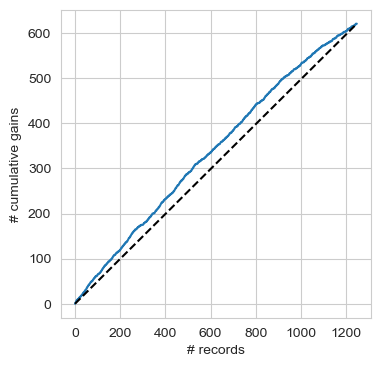

In [32]:
logit_reg_pred = logit_reg.predict_proba(train_X)
full_result = pd.DataFrame({'actual': train_y, 
                            'p(0)': [p[0] for p in logit_reg_pred],
                            'p(1)': [p[1] for p in logit_reg_pred],
                            'predicted': logit_reg.predict(train_X)})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)

# confusion matrix

classificationSummary(full_result.actual, full_result.predicted)
gainsChart(full_result.actual, figsize=[4, 4])
plt.show()

This snippet is used to evaluate the performance of a logistic regression model on the VALIDATION DATA and visualize its predictive capabilities using the gain chart. It provides insights into how well the model ranks instances and distuguishes between different classes based in their predicted probabilities.

Confusion Matrix (Accuracy 0.5614)

       Prediction
Actual   0   1
     0 563 370
     1 451 488


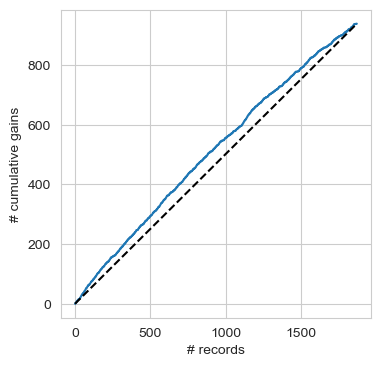

In [33]:
logit_reg_pred = logit_reg.predict_proba(valid_X)
full_result2 = pd.DataFrame({'actual': valid_y,
                             'p(0)': [p[0] for p in logit_reg_pred],
                             'p(1)': [p[1] for p in logit_reg_pred],
                             'predicted': logit_reg.predict(valid_X)})
full_result2 = full_result2.sort_values(by=['p(1)'], ascending=False)

# confusion matrix

classificationSummary(full_result2.actual, full_result2.predicted)
gainsChart(full_result2.actual, figsize=[4, 4])
plt.show()


The gains charts for the logistic regression model on both the 
training and validation datasets, providing insights into how well the model performs on each dataset and whether there are any significant differences in performance

<AxesSubplot:xlabel='# records', ylabel='# cumulative gains'>

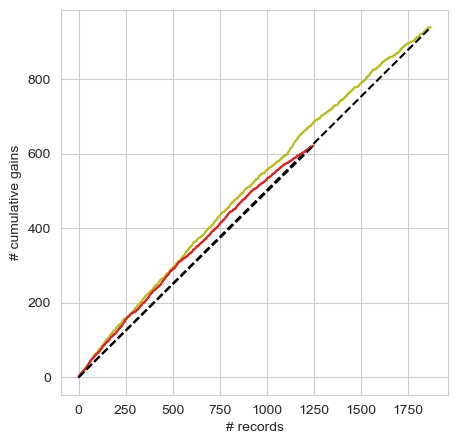

In [34]:
ax = gainsChart(full_result2.actual, color='C8', figsize=[5, 5]) #validation set

gainsChart(full_result.actual, color='C3', ax=ax) # training set

The code visualizes the performance of the logistic regression model on the TRAINING DATA using cumulative gains and lift charts, providing insights into how well the model ranks instances and the effectiveness of targeting based on the model's predictions.

##### The further away the cumulative gains chart from the diagonal benchmark line, the better the model is doing in separating records with high value outcomes from those with low value outcomes. 

##### The same information can be presented in a decile lift chart, where the ordered records are grouped into 10 deciles, and for each decile, the chart presents the ratio of model gains to naive benchmark gains, which is called lift.

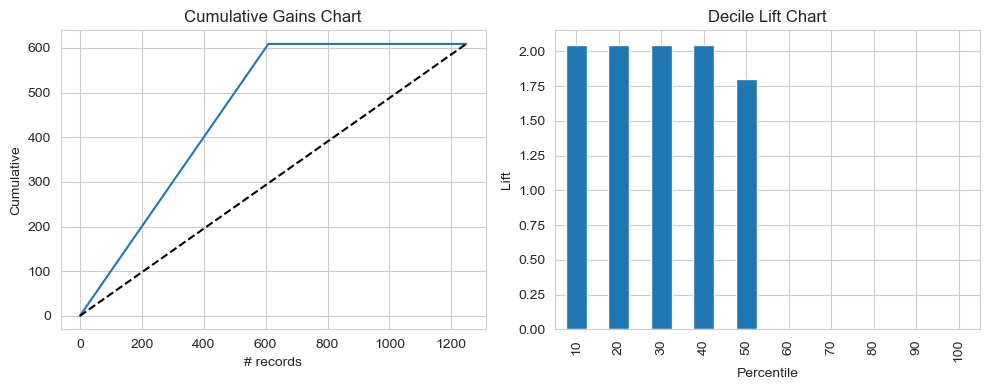

In [35]:
pred_v = pd.Series(logit_reg.predict(train_X))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

The code visualizes the performance of the logistic regression model on the VALIDATION DATA using cumulative gains and lift charts, providing insights into how well the model ranks instances and the effectiveness of targeting based on the model's predictions.

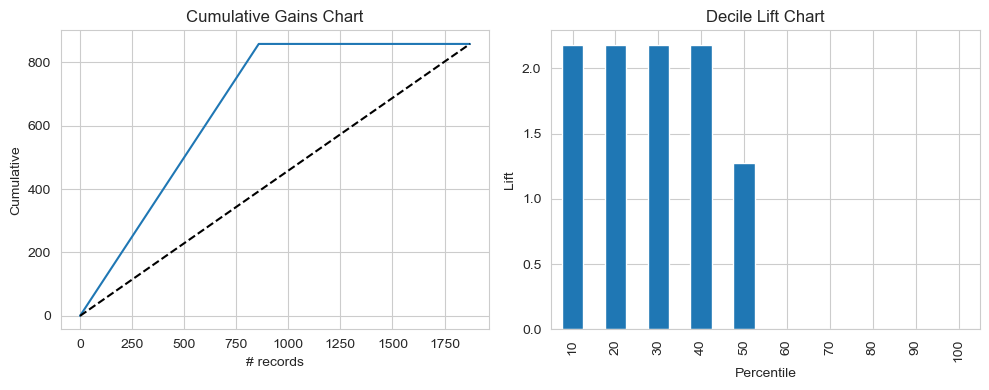

In [36]:
pred_v = pd.Series(logit_reg.predict(valid_X))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

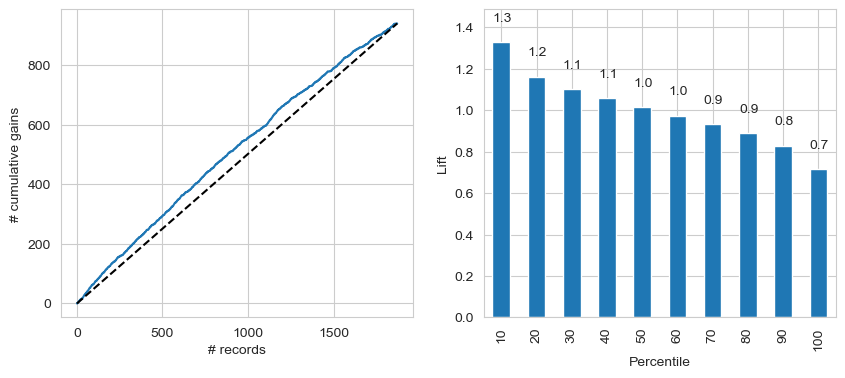

In [37]:
chart_df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(chart_df.actual, ax=axes[0])
liftChart(chart_df['p(1)'], title=False, ax=axes[1])
plt.show()

#### Based on the General Linear Model we see the P values with respect to TARGET_B to judge their relevance in the model. We further drop them down below because for training should have good predictors for the model p > 0.05

In [38]:
# use GLM (general linear model) with the binomial family to fit a logistic regression

logit_reg2 = sm.GLM(train_y, train_X, family=sm.families.Binomial())
logit_result = logit_reg2.fit()
logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               TARGET_B   No. Observations:                 1248
Model:                            GLM   Df Residuals:                     1227
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -847.80
Date:                Fri, 16 Feb 2024   Deviance:                       1695.6
Time:                        05:09:23   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02724
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Row Id          -7.851e-06   6.42e-05     -0.122      0.903      -0.000       0.000
zipconvert_2        1.2666      0.700      1.809      0.070      -0.106       2.639
zipconvert_3        1.0592      0.700      1.513      0.130      -0.313       2.432
zipconvert_4        1.1201      0.707      1.585      0.113      -0.265       2.505
zipconvert_5        1.4165      0.688      2.059      0.040       0.068       2.765
homeowner dummy     0.1676      0.147      1.139      0.255      -0.121       0.456
NUMCHLD            -0.0279      0.190     -0.147      0.883      -0.400       0.344
INCOME              0.0439      0.040      1.104      0.269      -0.034       0.122
gender dummy        0.0871      0.119      0.731      0.465      -0.146       0.321
WEALTH              0.0057      0.027      0.209      0.835      -0.048       0.059
HV              -3.131e-05      0.000     -0.272      0.785      -0.000       0.000
Icmed               0.0016      0.001      1.097      0.273      -0.001       0.004
Icavg              -0.0018      0.002     -1.139      0.255      -0.005       0.001
IC15               -0.0014      0.007     -0.208      0.835      -0.014       0.011
NUMPROM             0.0064      0.003      1.827      0.068      -0.000       0.013
RAMNTALL           -0.0002      0.001     -0.298      0.766      -0.001       0.001
MAXRAMNT           -0.0007      0.010     -0.075      0.940      -0.020       0.018
LASTGIFT            0.0019      0.012      0.167      0.867      -0.021       0.025
totalmonths        -0.0509      0.015     -3.362      0.001      -0.081      -0.021
TIMELAG            -0.0051      0.011     -0.465      0.642      -0.026       0.016
AVGGIFT            -0.0086      0.016     -0.528      0.598      -0.041       0.023
===================================================================================
"""

# Decision Tree Model

#### We Test Our Data of Different Models to Conclude which model works best for Predicting Values

In [39]:
import graphviz
import pydotplus

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn import tree

In [40]:
df2 = pd.read_csv (r'C:/Users/nisar/Downloads/Final Project/Fundraising.csv')
df2.head()

Row Id  Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0       1       17             0             1             0             0   
1       2       25             1             0             0             0   
2       3       29             0             0             0             1   
3       4       38             0             0             0             1   
4       5       40             0             1             0             0   

   homeowner dummy  NUMCHLD  INCOME  gender dummy  ...  IC15  NUMPROM  \
0                1        1       5             1  ...     1       74   
1                1        1       1             0  ...     4       46   
2                0        2       5             1  ...    13       32   
3                1        1       3             0  ...     4       94   
4                1        1       4             0  ...     7       20   

   RAMNTALL  MAXRAMNT  LASTGIFT  totalmonths  TIMELAG   AVGGIFT  TARGET_B  \
0     102.0       6.0       5.0           29        3  4.857143         1   
1      94.0      12.0      12.0           34        6  9.400000         1   
2      30.0      10.0       5.0           29        7  4.285714         1   
3     177.0      10.0       8.0           30        3  7.080000         0   
4      23.0      11.0      11.0           30        6  7.666667         0   

   TARGET_D  
0       5.0  
1      10.0  
2       5.0  
3       0.0  
4       0.0  

[5 rows x 24 columns]

In [41]:
#Dropping few variables based on GLM model to better predict future donors.
df2 = df2.drop(columns=['Row Id', 'zipconvert_2', 'zipconvert_3', 'zipconvert_4', 'zipconvert_5', 'Icavg', 'totalmonths', 'TARGET_D'], axis=1)

In [42]:
y = df2['TARGET_B']
X = df2.drop(columns=['TARGET_B'], axis=1)

#Partition data

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.6, random_state=1)


(process:53500): GLib-GIO-WARNING **: 05:09:30.576: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2312.33.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:53500): GLib-GIO-WARNING **: 05:09:30.591: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.9.1.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:53500): GLib-GIO-WARNING **: 05:09:30.623: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.131.300_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs



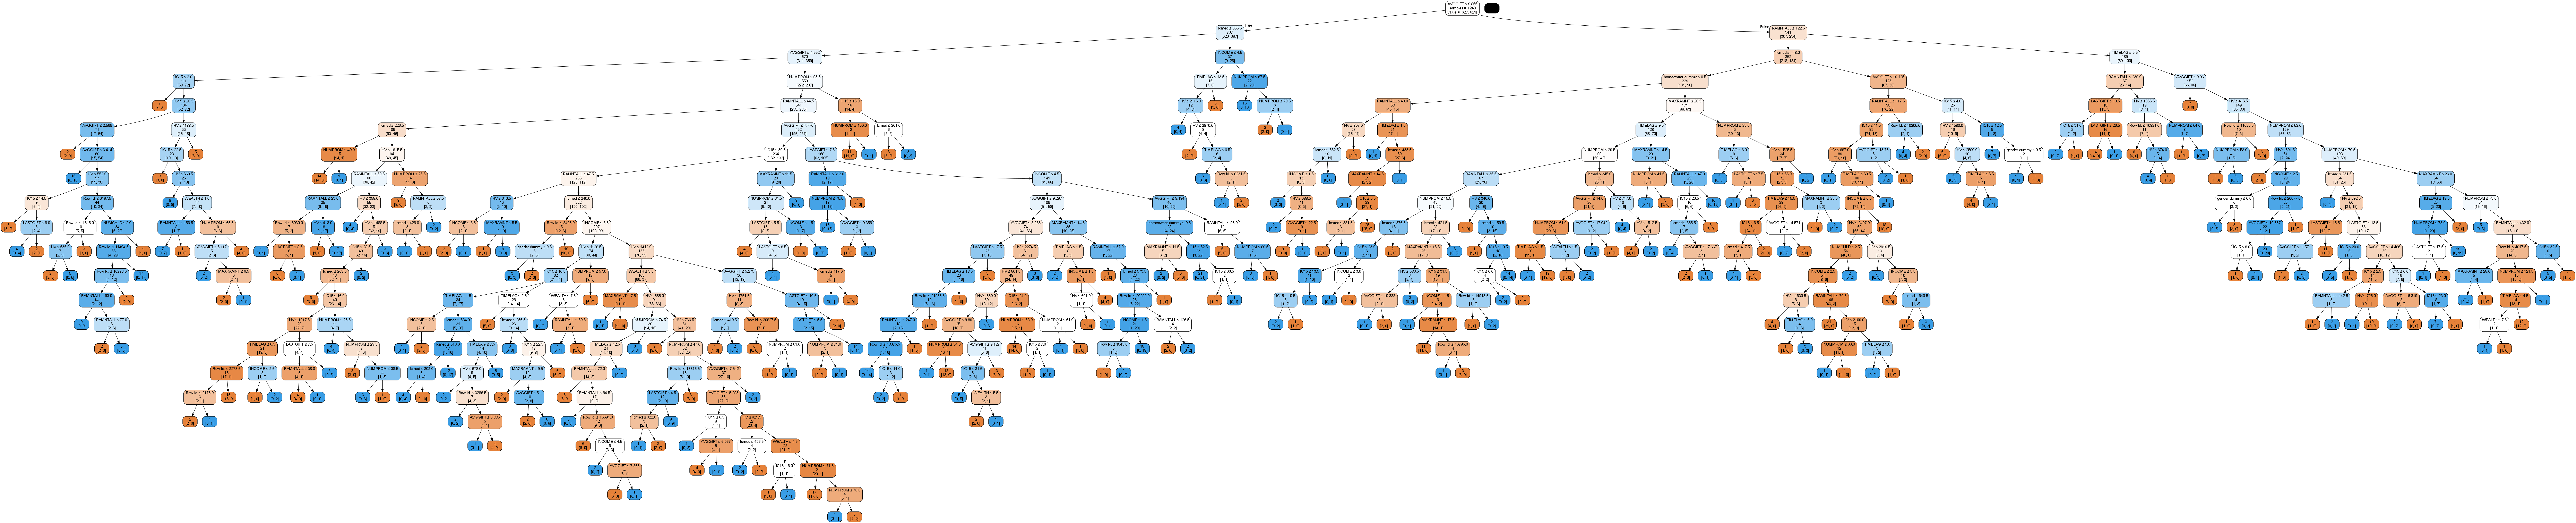

In [43]:
# Full Grown Decision Tree

fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)
plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [44]:
#Model Accuracy with all the columns

classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 627   0
     1   0 621
Confusion Matrix (Accuracy 0.5342)

       Prediction
Actual   0   1
     0 494 439
     1 433 506


#### Code for computing validation accuracy using 5-fold cross-validation on the full tree


In [45]:
treeClassifier = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc}' for acc in scores])

Accuracy scores of each fold:  ['0.532', '0.488', '0.5', '0.5020080321285141', '0.5060240963855421']


In [46]:
df3 = pd.read_csv (r'C:/Users/nisar/Downloads/Final Project/Fundraising.csv')
df3.head()

Row Id  Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0       1       17             0             1             0             0   
1       2       25             1             0             0             0   
2       3       29             0             0             0             1   
3       4       38             0             0             0             1   
4       5       40             0             1             0             0   

   homeowner dummy  NUMCHLD  INCOME  gender dummy  ...  IC15  NUMPROM  \
0                1        1       5             1  ...     1       74   
1                1        1       1             0  ...     4       46   
2                0        2       5             1  ...    13       32   
3                1        1       3             0  ...     4       94   
4                1        1       4             0  ...     7       20   

   RAMNTALL  MAXRAMNT  LASTGIFT  totalmonths  TIMELAG   AVGGIFT  TARGET_B  \
0     102.0       6.0       5.0           29        3  4.857143         1   
1      94.0      12.0      12.0           34        6  9.400000         1   
2      30.0      10.0       5.0           29        7  4.285714         1   
3     177.0      10.0       8.0           30        3  7.080000         0   
4      23.0      11.0      11.0           30        6  7.666667         0   

   TARGET_D  
0       5.0  
1      10.0  
2       5.0  
3       0.0  
4       0.0  

[5 rows x 24 columns]

In [47]:
y = df3['TARGET_B']
X = df3.drop(columns=['TARGET_B'], axis=1)

# Partition data

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.6, random_state=12345)

In [48]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=7)
classTree.fit(train_X, train_y)
min_samples_leaf=50

In [49]:
classTree.classes_

array([0, 1], dtype=int64)

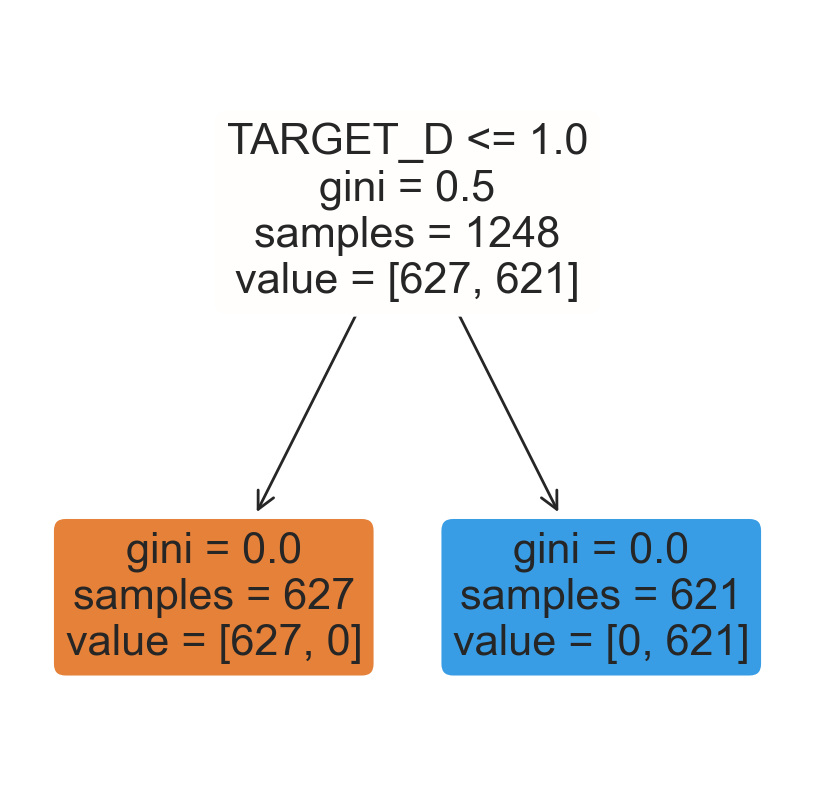

In [50]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)
 
tree.plot_tree(classTree,
           feature_names = train_X.columns, filled = True,rounded=True);
plt.show()

In [51]:
classificationSummary(train_y, classTree.predict(train_X))
classificationSummary(valid_y, classTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 627   0
     1   0 621
Confusion Matrix (Accuracy 0.9979)

       Prediction
Actual   0   1
     0 933   0
     1   4 935


In [52]:
df3 = df3.drop(columns=['Row Id', 'zipconvert_2', 'zipconvert_3', 'zipconvert_4', 'zipconvert_5', 'Icavg', 'totalmonths', 'TIMELAG', 'TARGET_D'], axis=1)

In [53]:
y = df3['TARGET_B']
X = df3.drop(columns=['TARGET_B'], axis=1)

# Partition data

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.6, random_state=12345)

In [54]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=7)
classTree.fit(train_X, train_y)
min_samples_leaf=50

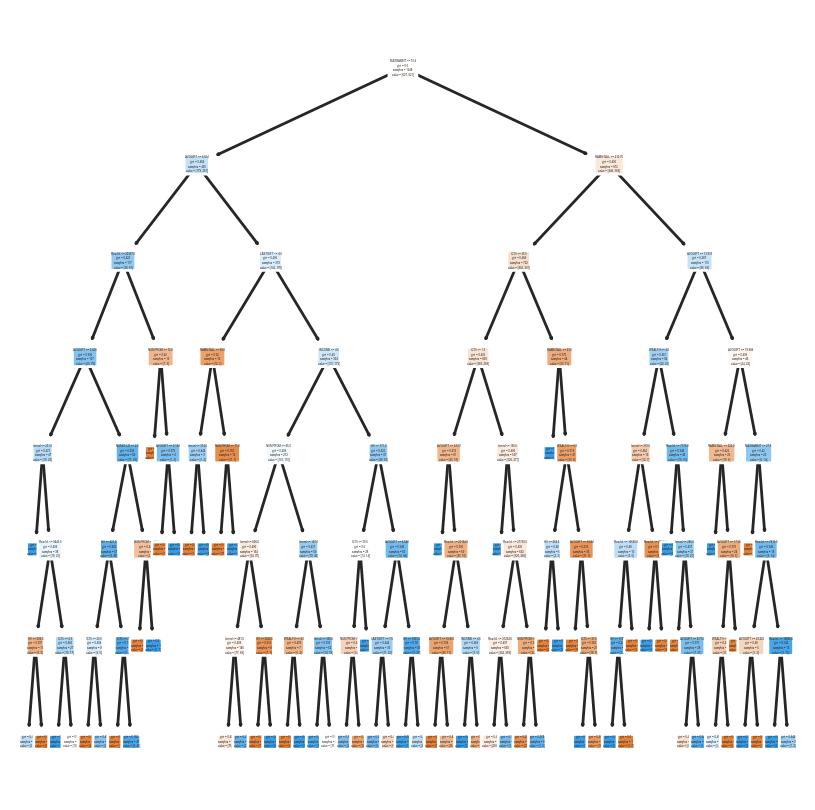

In [55]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)
 
tree.plot_tree(classTree,
           feature_names = train_X.columns, filled = True,rounded=True);
plt.show()

In [56]:
classificationSummary(train_y, classTree.predict(train_X))
classificationSummary(valid_y, classTree.predict(valid_X))

Confusion Matrix (Accuracy 0.6851)

       Prediction
Actual   0   1
     0 591  36
     1 357 264
Confusion Matrix (Accuracy 0.5251)

       Prediction
Actual   0   1
     0 743 190
     1 699 240


In [57]:
treeClassifier = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc}' for acc in scores])

Accuracy scores of each fold:  ['0.504', '0.532', '0.548', '0.5622489959839357', '0.4899598393574297']


#### Code for using GridSearchCV to fine tune method parameters
 

In [58]:

# Start with an initial guess for parameters
param_grid = {
'max_depth': [10, 20, 30, 40],
'min_samples_split': [20, 40, 60, 80, 100],
'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1) 

# n_jobs=-1 will utilize all available CPUs
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)
# Adapt grid based on result from initial grid search
param_grid = {
'max_depth': list(range(2, 16)), # 14 values
'min_samples_split': list(range(10, 22)), # 11 values
'min_impurity_decrease': [0.0009, 0.001, 0.0011], # 3 values
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,
n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

regressionSummary(train_y, bestClassTree.predict(train_X))
regressionSummary(valid_y, bestClassTree.predict(valid_X))

Initial score:  0.5481092369477911
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 20}
Improved score:  0.5368674698795181
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.0009, 'min_samples_split': 10}

Regression statistics

               Mean Error (ME) : 0.0601
Root Mean Squared Error (RMSE) : 0.6486
     Mean Absolute Error (MAE) : 0.4207

Regression statistics

               Mean Error (ME) : 0.0689
Root Mean Squared Error (RMSE) : 0.6695
     Mean Absolute Error (MAE) : 0.4482


#### Code for plotting and evaluating performance of fine-tuned classification tree

In [59]:
classificationSummary(train_y, bestClassTree.predict(train_X))

Confusion Matrix (Accuracy 0.5793)

       Prediction
Actual   0   1
     0 402 225
     1 300 321


In [60]:
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.5518)

       Prediction
Actual   0   1
     0 578 355
     1 484 455


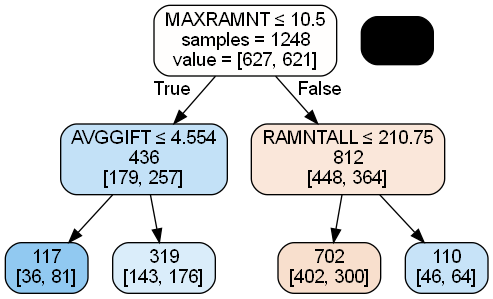

In [61]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

#### Fine-tuned classification tree for the Target_B(Donor or Non Donor) acceptance data using the training set (3120 records) 

# Random Forest Model

In [62]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [63]:
# variable (feature) importance plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

            feature  importance       std
2           NUMCHLD    0.007439  0.005169
1   homeowner dummy    0.015505  0.007260
4      gender dummy    0.017643  0.007564
5            WEALTH    0.041129  0.012485
3            INCOME    0.050851  0.013350
12         LASTGIFT    0.062277  0.015092
11         MAXRAMNT    0.063659  0.015928
8              IC15    0.088870  0.018242
9           NUMPROM    0.098191  0.018317
10         RAMNTALL    0.103070  0.022185
7             Icmed    0.107908  0.020461
6                HV    0.112332  0.022724
13          AVGGIFT    0.114562  0.023209
0           Row Id.    0.116563  0.023289


#### Variable importance plot from Random forest 

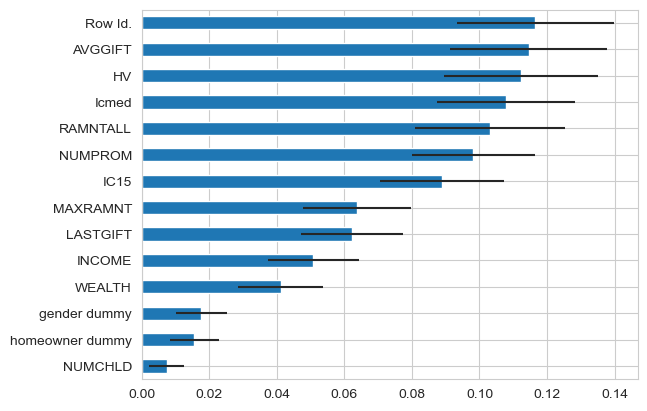

In [64]:
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()

In [65]:
classificationSummary(train_y, rf.predict(train_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 627   0
     1   0 621


In [66]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.5443)

       Prediction
Actual   0   1
     0 549 384
     1 469 470


# k-Nearest Neighbors (k-NN)

In [67]:
m_df = pd.read_csv(r'C:/Users/nisar/Downloads/Final Project/Fundraising.csv')
m_df['Number'] = m_df.index + 1
m_df.head(9)

Row Id  Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0       1       17             0             1             0             0   
1       2       25             1             0             0             0   
2       3       29             0             0             0             1   
3       4       38             0             0             0             1   
4       5       40             0             1             0             0   
5       6       53             0             1             0             0   
6       7       58             0             0             0             1   
7       8       61             1             0             0             0   
8       9       71             0             0             1             0   

   homeowner dummy  NUMCHLD  INCOME  gender dummy  ...  NUMPROM  RAMNTALL  \
0                1        1       5             1  ...       74     102.0   
1                1        1       1             0  ...       46      94.0   
2                0        2       5             1  ...       32      30.0   
3                1        1       3             0  ...       94     177.0   
4                1        1       4             0  ...       20      23.0   
5                1        1       4             1  ...       38      73.0   
6                1        1       4             1  ...       47     139.0   
7                1        1       1             0  ...       77     249.0   
8                1        1       4             0  ...       51      63.0   

   MAXRAMNT  LASTGIFT  totalmonths  TIMELAG    AVGGIFT  TARGET_B  TARGET_D  \
0       6.0       5.0           29        3   4.857143         1       5.0   
1      12.0      12.0           34        6   9.400000         1      10.0   
2      10.0       5.0           29        7   4.285714         1       5.0   
3      10.0       8.0           30        3   7.080000         0       0.0   
4      11.0      11.0           30        6   7.666667         0       0.0   
5      10.0      10.0           31        3   7.300000         1       8.0   
6      20.0      20.0           37        3  10.692308         1      10.0   
7      15.0       7.0           35        3   9.576923         1      20.0   
8      15.0      10.0           37        8   9.000000         1       5.0   

   Number  
0       1  
1       2  
2       3  
3       4  
4       5  
5       6  
6       7  
7       8  
8       9  

[9 rows x 25 columns]

In [68]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

In [69]:
trainData, validData = train_test_split(m_df, test_size=0.4, random_state=12345)
print(trainData.shape, validData.shape)

(1872, 25) (1248, 25)


In [70]:
newHousehold = pd.DataFrame([{'LASTGIFT': 5.0, 'AVGGIFT': 5.0}])
newHousehold

LASTGIFT  AVGGIFT
0       5.0      5.0

In [71]:
m_df.columns = [c.replace(' ', '_') for c in m_df.columns]
m_df

Row_Id  Row_Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0          1       17             0             1             0             0   
1          2       25             1             0             0             0   
2          3       29             0             0             0             1   
3          4       38             0             0             0             1   
4          5       40             0             1             0             0   
...      ...      ...           ...           ...           ...           ...   
3115    3116    23256             0             0             0             1   
3116    3117    23258             0             1             0             0   
3117    3118    23261             0             0             0             1   
3118    3119    23265             0             0             0             1   
3119    3120    23293             0             0             1             0   

      homeowner_dummy  NUMCHLD  INCOME  gender_dummy  ...  NUMPROM  RAMNTALL  \
0                   1        1       5             1  ...       74     102.0   
1                   1        1       1             0  ...       46      94.0   
2                   0        2       5             1  ...       32      30.0   
3                   1        1       3             0  ...       94     177.0   
4                   1        1       4             0  ...       20      23.0   
...               ...      ...     ...           ...  ...      ...       ...   
3115                1        1       4             0  ...       23      30.0   
3116                0        1       2             0  ...       29      53.0   
3117                1        1       3             0  ...       79     212.0   
3118                1        1       7             1  ...       27      60.0   
3119                1        1       5             1  ...       46     111.0   

      MAXRAMNT  LASTGIFT  totalmonths  TIMELAG    AVGGIFT  TARGET_B  TARGET_D  \
0          6.0       5.0           29        3   4.857143         1       5.0   
1         12.0      12.0           34        6   9.400000         1      10.0   
2         10.0       5.0           29        7   4.285714         1       5.0   
3         10.0       8.0           30        3   7.080000         0       0.0   
4         11.0      11.0           30        6   7.666667         0       0.0   
...        ...       ...          ...      ...        ...       ...       ...   
3115      16.0       4.0           29        5   7.500000         0       0.0   
3116      30.0      30.0           37        9  26.500000         1      40.0   
3117      20.0      20.0           36        3  11.157895         0       0.0   
3118      20.0      20.0           31        9  20.000000         0       0.0   
3119      22.0       9.0           36        5   9.250000         0       0.0   

      Number  
0          1  
1          2  
2          3  
3          4  
4          5  
...      ...  
3115    3116  
3116    3117  
3117    3118  
3118    3119  
3119    3120  

[3120 rows x 25 columns]

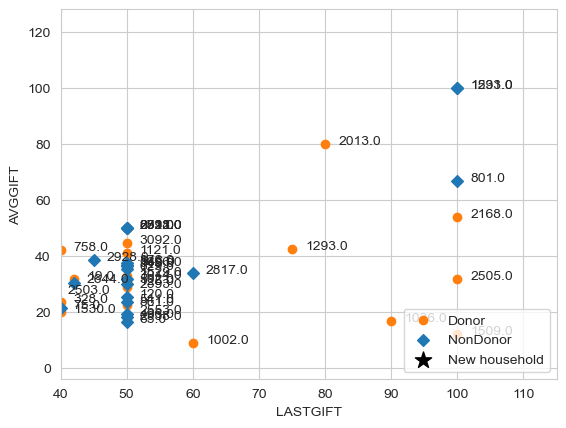

In [72]:
fig, ax = plt.subplots()

subset = trainData.loc[trainData['TARGET_B']==1]
ax.scatter(subset.LASTGIFT, subset.AVGGIFT, marker='o', label='Donor', color='C1')

subset = trainData.loc[trainData['TARGET_B']==0]
ax.scatter(subset.LASTGIFT, subset.AVGGIFT, marker='D', label='NonDonor', color='C0')

ax.scatter(newHousehold.LASTGIFT, newHousehold.AVGGIFT, marker='*', label='New household', color='black', s=150)

plt.xlabel('LASTGIFT')  # set x-axis label
plt.ylabel('AVGGIFT')  # set y-axis label
for _, row in trainData.iterrows():
    ax.annotate(row.Number, (row.LASTGIFT + 2, row.AVGGIFT))
    
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(40, 115)
ax.legend(handles, labels, loc=4)

plt.show()

In [73]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['LASTGIFT', 'AVGGIFT']])  # Note the use of an array of column names

# Transform the full dataset
mNorm = pd.concat([pd.DataFrame(scaler.transform(m_df[['LASTGIFT', 'AVGGIFT']]), 
                                    columns=['zLASTGIFT', 'zAVGGIFT']),
                       m_df[['TARGET_B', 'Number']]], axis=1)
trainNorm = mNorm.iloc[trainData.index]
validNorm = mNorm.iloc[validData.index]
newHouseholdNorm = pd.DataFrame(scaler.transform(newHousehold), columns=['zLASTGIFT', 'zAVGGIFT'])

In [74]:
m_df

Row_Id  Row_Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0          1       17             0             1             0             0   
1          2       25             1             0             0             0   
2          3       29             0             0             0             1   
3          4       38             0             0             0             1   
4          5       40             0             1             0             0   
...      ...      ...           ...           ...           ...           ...   
3115    3116    23256             0             0             0             1   
3116    3117    23258             0             1             0             0   
3117    3118    23261             0             0             0             1   
3118    3119    23265             0             0             0             1   
3119    3120    23293             0             0             1             0   

      homeowner_dummy  NUMCHLD  INCOME  gender_dummy  ...  NUMPROM  RAMNTALL  \
0                   1        1       5             1  ...       74     102.0   
1                   1        1       1             0  ...       46      94.0   
2                   0        2       5             1  ...       32      30.0   
3                   1        1       3             0  ...       94     177.0   
4                   1        1       4             0  ...       20      23.0   
...               ...      ...     ...           ...  ...      ...       ...   
3115                1        1       4             0  ...       23      30.0   
3116                0        1       2             0  ...       29      53.0   
3117                1        1       3             0  ...       79     212.0   
3118                1        1       7             1  ...       27      60.0   
3119                1        1       5             1  ...       46     111.0   

      MAXRAMNT  LASTGIFT  totalmonths  TIMELAG    AVGGIFT  TARGET_B  TARGET_D  \
0          6.0       5.0           29        3   4.857143         1       5.0   
1         12.0      12.0           34        6   9.400000         1      10.0   
2         10.0       5.0           29        7   4.285714         1       5.0   
3         10.0       8.0           30        3   7.080000         0       0.0   
4         11.0      11.0           30        6   7.666667         0       0.0   
...        ...       ...          ...      ...        ...       ...       ...   
3115      16.0       4.0           29        5   7.500000         0       0.0   
3116      30.0      30.0           37        9  26.500000         1      40.0   
3117      20.0      20.0           36        3  11.157895         0       0.0   
3118      20.0      20.0           31        9  20.000000         0       0.0   
3119      22.0       9.0           36        5   9.250000         0       0.0   

      Number  
0          1  
1          2  
2          3  
3          4  
4          5  
...      ...  
3115    3116  
3116    3117  
3117    3118  
3118    3119  
3119    3120  

[3120 rows x 25 columns]

In [75]:
knn = NearestNeighbors(n_neighbors=3)
knn.fit(trainNorm[['zLASTGIFT', 'zAVGGIFT']])
distances, indices = knn.kneighbors(newHouseholdNorm)
print(trainNorm.iloc[indices[0], :])  # indices is a list of lists, we are only interested in the first element

      zLASTGIFT  zAVGGIFT  TARGET_B  Number
2509  -0.771931 -0.741064         0    2510
589   -0.771931 -0.741064         0     590
2550  -0.771931 -0.741064         0    2551


#### We choose the k with the best classification performance. We use the training data to classify the records in the validation data, then compute error rates for various choices of k.

In [76]:
train_X = trainNorm[['zLASTGIFT', 'zAVGGIFT']]
train_y = trainNorm['TARGET_B']
valid_X = validNorm[['zLASTGIFT', 'zAVGGIFT']]
valid_y = validNorm['TARGET_B']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

C:\Users\nisar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nisar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

     k  accuracy
0    1  0.508814
1    2  0.520833
2    3  0.508814
3    4  0.509615
4    5  0.516827
5    6  0.516026
6    7  0.516827
7    8  0.527244
8    9  0.510417
9   10  0.524840
10  11  0.524840
11  12  0.508814
12  13  0.510417
13  14  0.510417


In [77]:
# Retrain with full dataset
m_X = mNorm[['zLASTGIFT', 'zAVGGIFT']]
m_y = mNorm['TARGET_B']
knn = KNeighborsClassifier(n_neighbors=20).fit(m_X, m_y)
distances, indices = knn.kneighbors(newHouseholdNorm)
print(knn.predict(newHouseholdNorm))
print('Distances',distances)
print('Indices', indices)
print(mNorm.iloc[indices[0], :])

[0]
Distances [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Indices [[ 319 2594 2569 2370 1877 2430 2338 1845 1576 1160 2035 1274  561  708
   670 1406  139 1158  589 1025]]
      zLASTGIFT  zAVGGIFT  TARGET_B  Number
319   -0.771931 -0.741064         0     320
2594  -0.771931 -0.741064         1    2595
2569  -0.771931 -0.741064         0    2570
2370  -0.771931 -0.741064         0    2371
1877  -0.771931 -0.741064         1    1878
2430  -0.771931 -0.741064         1    2431
2338  -0.771931 -0.741064         1    2339
1845  -0.771931 -0.741064         1    1846
1576  -0.771931 -0.741064         0    1577
1160  -0.771931 -0.741064         1    1161
2035  -0.771931 -0.741064         1    2036
1274  -0.771931 -0.741064         0    1275
561   -0.771931 -0.741064         0     562
708   -0.771931 -0.741064         1     709
670   -0.771931 -0.741064         1     671
1406  -0.771931 -0.741064         0    1407
139   -0.771931 -0.741064         0     140
1158  -0.771931 

C:\Users\nisar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Prediciting on a New Dataset File

In [78]:
futureFundraising_df = pd.read_csv (r'C:/Users/nisar/Downloads/Final Project/FutureFundraising.csv')
futureFundraising_df.head()

Row Id  Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0       1        3             0             1             0             0   
1       2        4             0             0             1             0   
2       3        5             0             0             0             1   
3       4        1             0             0             0             0   
4       5        4             0             0             1             0   

   homeowner dummy  NUMCHLD  INCOME  gender dummy  ...  IC15  NUMPROM  \
0                1        1       1             1  ...     3       42   
1                0        1       2             1  ...     4       21   
2                0        1       1             0  ...    10       61   
3                1        1       4             0  ...    21       32   
4                1        1       7             1  ...     1       47   

   RAMNTALL  MAXRAMNT  LASTGIFT  totalmonths  TIMELAG    AVGGIFT  TARGET_B  \
0      92.0      29.0      15.0           17        8  15.333333       NaN   
1      30.0      20.0      20.0           33        9  15.000000       NaN   
2     220.0      35.0      25.0           31        9  24.444444       NaN   
3      41.0      19.0      19.0           31       13  13.666667       NaN   
4      46.0      10.0      10.0           28        8   5.750000       NaN   

   TARGET_D  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 24 columns]

In [79]:
futureFundraising_df.shape

(2000, 24)

In [80]:
futureFundraising_df = futureFundraising_df.drop(columns=['TARGET_B', 'TARGET_D'], axis=1)

In [81]:
futureFundraising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row Id           2000 non-null   int64  
 1   Row Id.          2000 non-null   int64  
 2   zipconvert_2     2000 non-null   int64  
 3   zipconvert_3     2000 non-null   int64  
 4   zipconvert_4     2000 non-null   int64  
 5   zipconvert_5     2000 non-null   int64  
 6   homeowner dummy  2000 non-null   int64  
 7   NUMCHLD          2000 non-null   int64  
 8   INCOME           2000 non-null   int64  
 9   gender dummy     2000 non-null   int64  
 10  WEALTH           2000 non-null   int64  
 11  HV               2000 non-null   int64  
 12  Icmed            2000 non-null   int64  
 13  Icavg            2000 non-null   int64  
 14  IC15             2000 non-null   int64  
 15  NUMPROM          2000 non-null   int64  
 16  RAMNTALL         2000 non-null   float64
 17  MAXRAMNT      

In [82]:
prediction = logit_reg.predict_proba(futureFundraising_df.drop(columns=['Row Id.']))
prediction


array([[0.38087108, 0.61912892],
       [0.60969519, 0.39030481],
       [0.51973377, 0.48026623],
       ...,
       [0.54672241, 0.45327759],
       [0.4962061 , 0.5037939 ],
       [0.48144866, 0.51855134]])

In [83]:
mailingCandidates = pd.DataFrame({'Row Id' : futureFundraising_df['Row Id'], 'prediction': prediction[:,1]})

In [84]:
mailingCandidates = mailingCandidates.sort_values(by=['prediction'],ascending = False).reset_index(drop=True)

In [85]:
mailingCandidates.head(10)

Row Id  prediction
0    1014    0.817597
1     722    0.781285
2      56    0.770142
3     120    0.764450
4     165    0.762083
5      26    0.754360
6    1606    0.751669
7     792    0.740057
8     411    0.728107
9     778    0.727139

In [86]:
from pathlib import Path  
filepath = Path(r'C:/Users/nisar/Downloads/Final Project/PredictionFile.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
mailingCandidates.to_csv(filepath)